this jupyter notebook has to be same directory with Subclassing

## load dataset

In [1]:
from Subclassing.datasets import sampled_dataset

sample_data = sampled_dataset.load_data()
print(sample_data.shape)

(5000, 785)


In [2]:
from Subclassing.utils import dataset_split

data_feature, data_target = dataset_split(sample_data)
print(data_feature.shape, data_target.shape)

(5000, 28, 28, 1) (5000,)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_feature, data_target, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(2800, 28, 28, 1) (2800,)
(1200, 28, 28, 1) (1200,)
(1000, 28, 28, 1) (1000,)


## load model class

In [4]:
from keras.layers import Input
from keras import Model
from Subclassing.models import LeNet5

num_of_classes = 36

modeel = LeNet5(num_of_classes)
input_layer = Input(shape=(28,28,1))
modeel = Model(inputs=[input_layer], outputs=[modeel(input_layer)])
modeel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 LeNet5 (LeNet5)             (None, 36)                2067048   
                                                                 
Total params: 2,067,048
Trainable params: 2,067,048
Non-trainable params: 0
_________________________________________________________________


2023-02-12 06:30:36.303275: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## compile, fit model using callbacks

In [5]:
modeel.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
from Subclassing.utils import F1ScoreCallback
from keras.callbacks import EarlyStopping

epoch_atience = 5

f1callback = F1ScoreCallback(x_val, y_val)
earlystop = EarlyStopping(
    monitor='val_loss',
    patience=epoch_atience,
    verbose=1,
    restore_best_weights=True
)

In [7]:
model_history = modeel.fit(x_train, y_train, epochs=10, verbose=1, validation_data=(x_val, y_val), callbacks=[
    f1callback,
    earlystop
])

Epoch 1/10
88/88 [==============================] - 6s 69ms/step - loss: 2.0266 - accuracy: 0.4975 - val_loss: 1.0301 - val_accuracy: 0.7225 - val_f1_micro: 0.5933 - val_f1_none: 0.3793
Epoch 2/10
88/88 [==============================] - 6s 65ms/step - loss: 0.7895 - accuracy: 0.7943 - val_loss: 0.6438 - val_accuracy: 0.8267 - val_f1_micro: 0.7458 - val_f1_none: 0.5808
Epoch 3/10
88/88 [==============================] - 6s 65ms/step - loss: 0.4680 - accuracy: 0.8654 - val_loss: 0.4558 - val_accuracy: 0.8850 - val_f1_micro: 0.8525 - val_f1_none: 0.7400
Epoch 4/10
88/88 [==============================] - 6s 71ms/step - loss: 0.2886 - accuracy: 0.9161 - val_loss: 0.4409 - val_accuracy: 0.8850 - val_f1_micro: 0.8658 - val_f1_none: 0.7645
Epoch 5/10
88/88 [==============================] - 6s 68ms/step - loss: 0.2389 - accuracy: 0.9232 - val_loss: 0.4307 - val_accuracy: 0.8842 - val_f1_micro: 0.8675 - val_f1_none: 0.7717
Epoch 6/10
88/88 [==============================] - 6s 67ms/step - los

## plot model train history

In [8]:
import matplotlib.pyplot as plt

In [9]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'val_f1_micro', 'val_f1_none'])


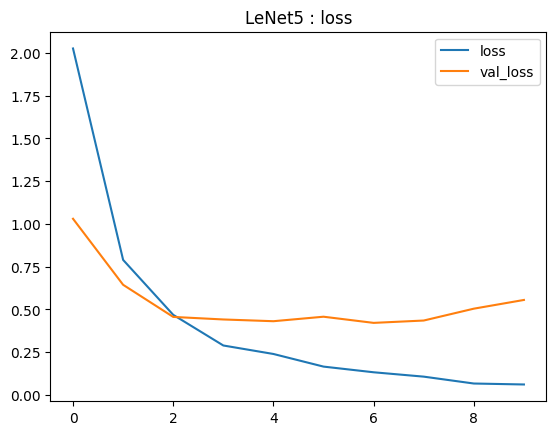

In [10]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.title("LeNet5 : loss")
plt.legend()
plt.show()

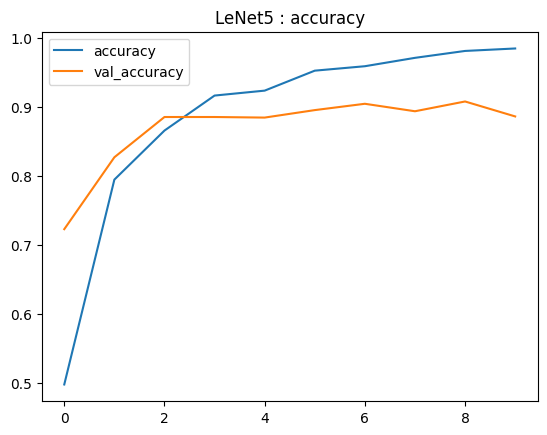

In [12]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.title("LeNet5 : accuracy")
plt.legend()
plt.show()

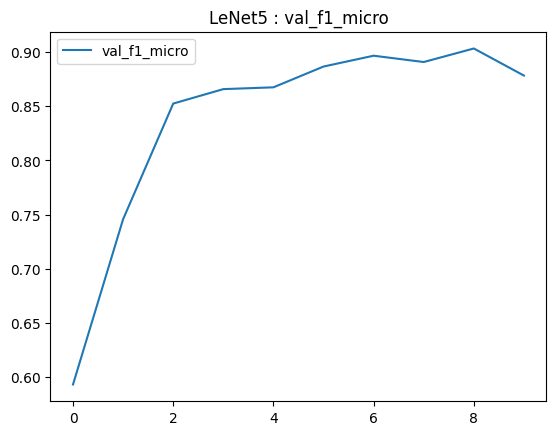

In [13]:
plt.plot(model_history.history['val_f1_micro'], label='val_f1_micro')
plt.title("LeNet5 : val_f1_micro")
plt.legend()
plt.show()

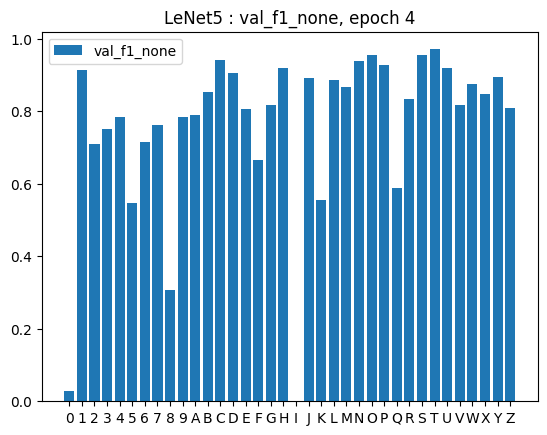

In [14]:
label = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"

max_epoch = max(model_history.epoch)

plt.bar(list(label), model_history.history['val_f1_none'][max_epoch - 1 - epoch_atience], label='val_f1_none')
plt.title(f"LeNet5 : val_f1_none, epoch {max_epoch - epoch_atience}")
plt.legend()
plt.show()


In [ ]:
fig, axes = plt.subplots(int(max(model_history.epoch) / 10) + 1, 10, figsize=(45, 30))

for i, ax in enumerate(axes.flat) : 
    if i > len(model_history.epoch) - 1 : 
        break
    ax.bar(list(label), model_history.history['val_f1_none'][i])
    ax.set_title("LeNet5 : val_f1_none epoch: {}    ".format(i + 1), fontsize=22)

plt.tight_layout()
plt.show()